### Transfer learning 
Training a neural network on traffic images to perform binary classification as:<br>
1) **medium** congested, classified as label **0**.<br>
2) **low** congested, classified as label **1**.<br>

Here we are using [Keras](https://github.com/keras-team/keras) with [TensorFlow](https://www.tensorflow.org/) backend to demostrate transfer learning on the [traffic images API](https://api.data.gov.sg/v1/transport/traffic-images) to classify images.
Training is first done on 9 images each from each class, then we 'freeze' the *feature layers* and rebuild the model to classify the remaining images.

After 87 images were scrapped each time from the [API](https://api.data.gov.sg/v1/transport/traffic-images) on 2 different times of the day - assuming one was during **peak time** and other was during **off-peak**, they had to be manually labelled.<br>

Images have been split to train and test (validation) set in the data folder. <br>

#### Import packages
Source: https://github.com/keras-team/keras/blob/master/examples/mnist_transfer_cnn.py

In [1]:
#from env py35
import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

C:\Users\hafsa\AppData\Local\conda\conda\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We will be using this later to record how long it takes to train our model.

In [2]:
now = datetime.datetime.now
print (now())

2018-12-21 02:02:40.948787


#### Instantiation of hyperparameters

Here we instantiate the values of hyperparameters that we will be using later. We will stick to the parameters similar to the deep neural network except for the `epochs` which is reduced, as CNN are more computationally expensive.

Some terms to define for my reference:<br>
1) `batch_size`: total # of training examples present in the dataset<br>
2) `number of batches`: # of sets/parts a dataset is divided.<br>
3) `iterations`: # of batches needed to complete one epoch. AKA number of batches.<br>
4) `epoch`: when an entire dataset is passed once, forward and backward through the neural network.

We have 18 images in the training data. <br>
Batch size of 3 images are to be passed in 6 iterations/number of batches for one epoch.<br>
OR <br>
Batch size of 6 images are to be passed in 3 iterations/number of batches for one epoch.

In [4]:
batch_size = 3
num_classes = 6
epochs = 3

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3

In [5]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

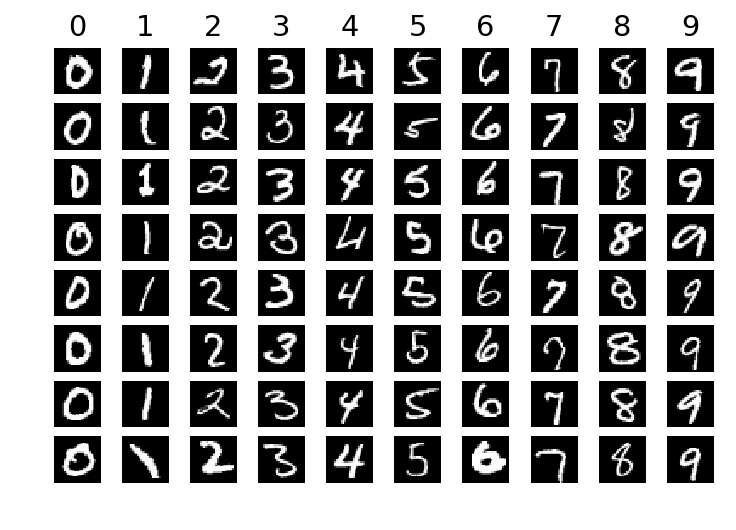

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
examples_per_class = 8 # number of examples you want to see from each class
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cls, cls_name in enumerate(classes):
  idxs = np.where(cls == y_train)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
    plt.imshow(x_train[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name)

#### Writing our own function to train different models

Here, `train_model` takes in a `model`, `train`, `test` and `num_classes`
- `model` : the model of the neural network you are training to perform your task
- `train` : training set
- `test` : test set
- `num_classes` : number of classes for the classification problem

`train_model` is a user-defined function which allows us to design the function to our needs. It helps to *reduce the amount of code* to be written when your task involves running similar operations but with different inputs. In this example, `train_model` does the following operations: 
1. reshaping of the training samples
2. normalization of the training samples
3. converting the labels to binary vectors
4. compiling your model
5. training your model
6. evaluates your model accuracy

In [7]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape) # reshaping of the data into the required format
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    # normalize your dataset
    # FILL IN HERE
    #2
    x_train /= 255
    x_test /= 255
    
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    # FILL IN HERE
    #3 
    y_train = keras.utils.to_categorical(train[1], num_classes)#train0 -data, train 1 -label for data
    y_test = keras.utils.to_categorical(test[1], num_classes)
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Loss:', score[0]) # the first index of score gives the loss value
    print('Test accuracy:', score[1]) # the second index of score gives the test accuracy

#### Splitting the data

In [8]:
array = np.arange(10)
print (array)
print (array >= 5)
print (array[array >= 5])

[0 1 2 3 4 5 6 7 8 9]
[False False False False False  True  True  True  True  True]
[5 6 7 8 9]


In [9]:
# split your dataset into two sets
# (1) sample that have labels lesser than 5 (lt5)
# (2) sample that have labels greater than or equal to 5 (gt5)
# FILL IN HERE

# (lt5) lesser than 5 set
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

# (gt5) greater than 5 set
x_train_gt5 = x_train[y_train >= 5]
y_train_gt5 = y_train[y_train >= 5] - 5
x_test_gt5 = x_test[y_test >= 5]
y_test_gt5 = y_test[y_test >= 5] -5

In [10]:
np.unique(y_test_gt5)

array([0, 1, 2, 3, 4], dtype=uint8)

In [11]:
# dimensions of samples lesser than 5
print('x_train_lt5 shape:', x_train_lt5.shape)

# dimensions of samples greater than 5
print('x_train_gt5 shape:', x_train_gt5.shape)

x_train_lt5 shape: (30596, 28, 28)
x_train_gt5 shape: (29404, 28, 28)


In [12]:
print (y_train_lt5)
print (y_train_gt5)

[0 4 1 ... 2 1 3]
[0 4 0 ... 0 1 3]


#### Define two groups of layers: feature (convolutions) and classification (dense)

Here we also explore another way to implement the the `Sequential model`

```
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

```

In [13]:
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [14]:
# implement the feature layers here using the classification layer 
# above as a reference


feature_layers = [
    # FILL IN HERE
    Conv2D(filters, kernel_size, padding = 'valid', input_shape = input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size = pool_size),
    Dropout(0.25),
    Flatten()
]

#### Creating our first model to train on the digits from 0 - 4
Here `feature_layers + classification_layers` concatenates the layers that were declared earlier above

In [15]:
model = Sequential(feature_layers + classification_layers)

In [16]:
# print out the model summary to verify that your model is correct
# FILL IN HERE
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

#### Training our first model

In [17]:
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 44s 1ms/step - loss: 0.1689 - acc: 0.9460 - val_loss: 0.0505 - val_acc: 0.9831
Epoch 2/5
30596/30596 [==============================] - 46s 2ms/step - loss: 0.0462 - acc: 0.9857 - val_loss: 0.0142 - val_acc: 0.9951
Epoch 3/5
30596/30596 [==============================] - 47s 2ms/step - loss: 0.0334 - acc: 0.9900 - val_loss: 0.0114 - val_acc: 0.9955
Epoch 4/5
30596/30596 [==============================] - 45s 1ms/step - loss: 0.0256 - acc: 0.9932 - val_loss: 0.0079 - val_acc: 0.9967
Epoch 5/5
30596/30596 [==============================] - 45s 1ms/step - loss: 0.0219 - acc: 0.9936 - val_loss: 0.0076 - val_acc: 0.9975
Training time: 0:03:47.423987
Loss: 0.007580099425578568
Test accuracy: 0.9974703249659467


#### Freeze feature layers and rebuild model

To "freeze" a layer means to exclude it from training, i.e. its weights will never be updated. This is useful in the context of fine-tuning a model, or using fixed embeddings for a text input.
You can pass a trainable argument (boolean) to a layer constructor to set a layer to be non-trainable:
```
frozen_layer = Dense(32, trainable=False)
```
we can do that for mulitple layers by iterating over all the layers and setting `.trainable = False`.

In [0]:
for l in feature_layers:
    l.trainable = False

#### Transfer the learning: train dense layers for new classification of digits from 5 - 9

In [29]:
# using samples that consists of digits from 5 - 9 train the 
# model that you have trained previously to train on this new data
# FILL IN HERE
#same model, data changes
train_model(model,
            (x_train_gt5, y_train_gt5),
            (x_test_gt5, y_test_gt5), num_classes)


x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Train on 29404 samples, validate on 4861 samples
Epoch 1/5
29404/29404 [==============================] - 3s 103us/step - loss: 0.2362 - acc: 0.9312 - val_loss: 0.0485 - val_acc: 0.9850
Epoch 2/5
29404/29404 [==============================] - 3s 91us/step - loss: 0.0757 - acc: 0.9765 - val_loss: 0.0370 - val_acc: 0.9868
Epoch 3/5
29404/29404 [==============================] - 3s 91us/step - loss: 0.0590 - acc: 0.9826 - val_loss: 0.0283 - val_acc: 0.9901
Epoch 4/5
29404/29404 [==============================] - 3s 91us/step - loss: 0.0491 - acc: 0.9845 - val_loss: 0.0282 - val_acc: 0.9903
Epoch 5/5
29404/29404 [==============================] - 3s 90us/step - loss: 0.0452 - acc: 0.9858 - val_loss: 0.0257 - val_acc: 0.9918
Training time: 0:00:14.069433
Loss: 0.025726207492940033
Test accuracy: 0.9917712404854968


Reshape the data to feed into our network

In [18]:
x_test_gt5 = x_test_gt5.reshape((x_test_gt5.shape[0],) + input_shape)

In [19]:
output = model.predict_classes(x_test_gt5)
print (output)

[2 4 0 ... 4 0 4]


In [20]:
ind = np.where(np.equal(output, y_test_gt5)==0)

In [21]:
x_test_gt5 = x_test[y_test >= 5]
err_x = x_test_gt5[ind[0]]
err_y = output[ind[0]]
print (err_x.shape)

(3041, 28, 28)


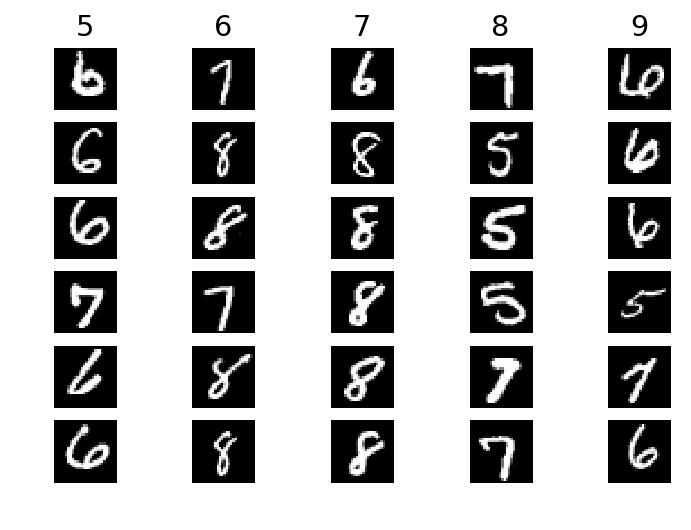

In [22]:
examples_per_class = 6
classes = [5, 6, 7, 8, 9]

for cls, cls_name in enumerate(classes):
  idxs = np.where(cls == err_y)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=True) #replace = False 
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
    plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name)